**Apollo Hospitals** was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.


- As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.

- You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.


- One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

**How can you help here?**

The company wants to know:

- Which variables are significant in predicting the reason for hospitalization for different regions

- How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

# Column Profiling

**Age:** 
- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

**Sex:** 
- This is the policy holder's gender, either male or female. 

**Viral Load:** 
- Viral load refers to the amount of virus in an infected person's blood. 

**Severity Level:** 
- This is an integer indicating how severe the patient is. 

**Smoker:** 
- This is yes or no depending on whether the insured regularly smokes tobacco.

**Region:** 
- This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest

**Hospitalization charges:** 
- Individual medical costs billed to health insurance

# Concept Used:

- Graphical and Non-Graphical Analysis
- 2-sample t-test: testing for difference across populations
- ANOVA
- Chi-square

# How to begin

- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
- Try establishing a relation between the dependent and independent variable (Dependent “hospitalization charges” & Independent: Smoker, Severity Level etc)
**Statistical Analysis:**
- Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)
- Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)
- Is the proportion of smoking significantly different across different regions? (Chi-square)
- Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)

- Set up Null Hypothesis (H0)
- State the alternate hypothesis (H1)
- Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
- Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary
- Set a significance level (alpha)
- Calculate test Statistics.
- Decision to accept or reject null hypothesis.
- Inference from the analysis

# Evaluation Criteria (80 Points)

- Define Problem Statement and perform Exploratory Data Analysis (10 points)
- Definition of problem (as per given problem statement with additional views)
- Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
- Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
- Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
- Illustrate the insights based on EDA
- Comments on range of attributes, outliers of various attributes
- Comments on the distribution of the variables and relationship between them
- Comments for each univariate and bivariate plots
- Missing values Treatment & Outlier treatment (10 Points)
- Hypothesis Testing (40 Points):
- Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't? (10 Points)
- Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (10 Points)
- Is the proportion of smoking significantly different across different regions? (10 Points)
- Is the mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (10 Points)
- What good looks like (distribution of 10 points):
- Visual analysis (2)
- Hypothesis formulation (1)
- Select the appropriate test (1)
- Check test assumptions (4)
- Find the p-value(1)
- Conclusion based on the p-value(1)
- Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it.
- Recommendations(10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand.

# Setting up Environment / Importing required packages

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from numpy import NaN, nan, NAN
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


# Loading data into Dataframe

In [4]:
apollo=pd.read_csv('scaler_apollo_hospitals.txt')
apollo

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...,...
1333,1333,50,male,no,northwest,10.32,3,26501
1334,1334,18,female,no,northeast,10.64,0,5515
1335,1335,18,female,no,southeast,12.28,0,4075
1336,1336,21,female,no,southwest,8.60,0,5020


In [5]:
apollo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


# Changing datatype of smoker, sex, region from Object to Category.

In [47]:
cols = ['smoker', 'sex', 'region']
for i in cols:
    apollo[i] = apollo[i].astype("category")
apollo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Unnamed: 0               1338 non-null   int64   
 1   age                      1338 non-null   int64   
 2   sex                      1338 non-null   category
 3   smoker                   1338 non-null   category
 4   region                   1338 non-null   category
 5   viral load               1338 non-null   float64 
 6   severity level           1338 non-null   int64   
 7   hospitalization charges  1338 non-null   int64   
dtypes: category(3), float64(1), int64(4)
memory usage: 56.7 KB


In [48]:
num_cols=['age','viral load','severity level']

In [13]:
apollo[apollo.isna().any(axis=1)]


,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges


In [14]:
apollo[apollo.isnull().any(axis=1)]

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges


In [11]:

apollo.isnull().sum()/len(apollo) *100


Unnamed: 0                 0.0
age                        0.0
sex                        0.0
smoker                     0.0
region                     0.0
viral load                 0.0
severity level             0.0
hospitalization charges    0.0
dtype: float64

In [12]:
apollo.duplicated().sum()

0

In [10]:
apollo.nunique()

Unnamed: 0                 1338
age                          47
sex                           2
smoker                        2
region                        4
viral load                  462
severity level                6
hospitalization charges    1320
dtype: int64

In [15]:
apollo.describe()


,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [16]:
apollo.describe(include=[np.object])


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


**Observations:**

- There are total 3 categorical features namely sex, smoker, region and 5 numerical/continuos features . In total 8 independent features with 1338 rows.
- Missing data or Null values are not present , neither any duplicated row is there.

# Outlier Detection and Removal:

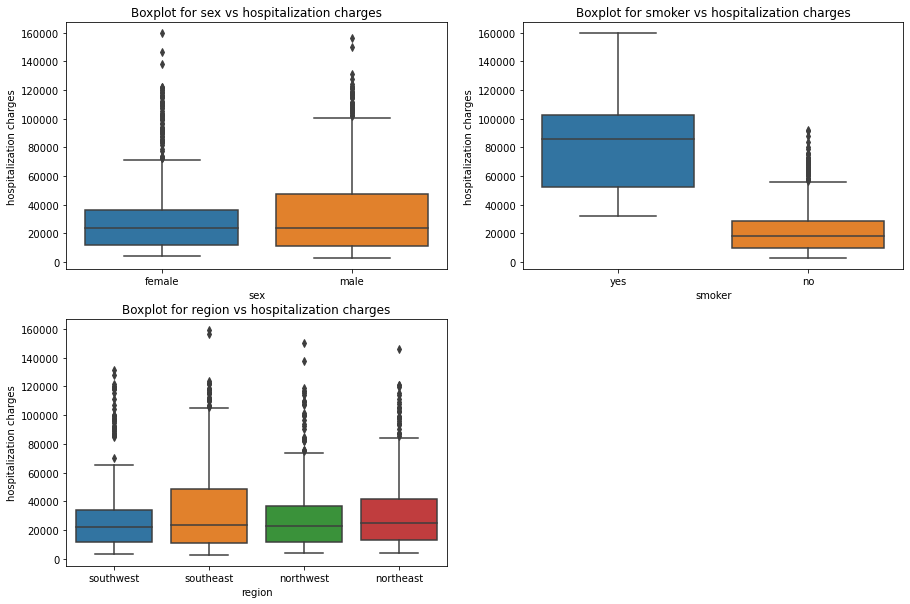

In [24]:
# Visualization before outlier removal
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.boxplot(x = 'sex', y = 'hospitalization charges', data = apollo)
ax1.set_title('Boxplot for sex vs hospitalization charges')

ax1 = fig.add_subplot(222)
sns.boxplot(x = 'smoker', y = 'hospitalization charges', data = apollo)
ax1.set_title('Boxplot for smoker vs hospitalization charges')

ax1 = fig.add_subplot(223)
sns.boxplot(x = 'region', y = 'hospitalization charges', data = apollo)
ax1.set_title('Boxplot for region vs hospitalization charges')

plt.show()

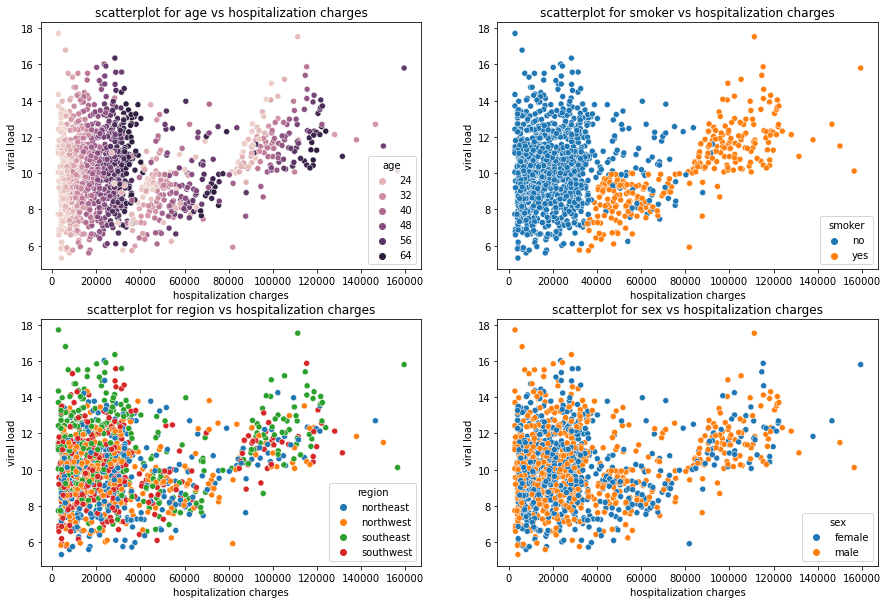

In [177]:
# Visualization before outlier removal
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.scatterplot(x = 'hospitalization charges', y = 'viral load',data = apollo, hue ='age' )
ax1.set_title('scatterplot for age vs hospitalization charges')

ax1 = fig.add_subplot(222)
sns.scatterplot(x ='hospitalization charges', y = 'viral load', data = apollo, hue ='smoker')
ax1.set_title('scatterplot for smoker vs hospitalization charges')

ax1 = fig.add_subplot(223)
sns.scatterplot(x = 'hospitalization charges', y = 'viral load',data = apollo, hue ='region')
ax1.set_title('scatterplot for region vs hospitalization charges')

ax1 = fig.add_subplot(224)
sns.scatterplot(x = 'hospitalization charges',y = 'viral load',data = apollo, hue ='sex')
ax1.set_title('scatterplot for sex vs hospitalization charges')

plt.show()

In [25]:
q1=apollo['hospitalization charges'].quantile(0.25)
q3=apollo['hospitalization charges'].quantile(0.75)
iqr=q3-q1
q1, q3, iqr

(11851.0, 41599.5, 29748.5)

In [35]:
apollo_dcopy = apollo.copy() # Taken backup of orginial dataset before removing outliers

In [36]:
apollo_dcopy = apollo_dcopy[(apollo_dcopy['hospitalization charges'] >= q1 - 1.5*iqr) & (apollo_dcopy['hospitalization charges'] <= q3 +1.5*iqr)]
apollo_dcopy

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...,...
1333,1333,50,male,no,northwest,10.32,3,26501
1334,1334,18,female,no,northeast,10.64,0,5515
1335,1335,18,female,no,southeast,12.28,0,4075
1336,1336,21,female,no,southwest,8.60,0,5020


In [37]:
apollo_dcopy.shape[0], apollo.shape[0]

(1199, 1338)

In [42]:
apollo.shape[0] - apollo_dcopy.shape[0]

139

In [43]:
apollo.shape

(1338, 8)

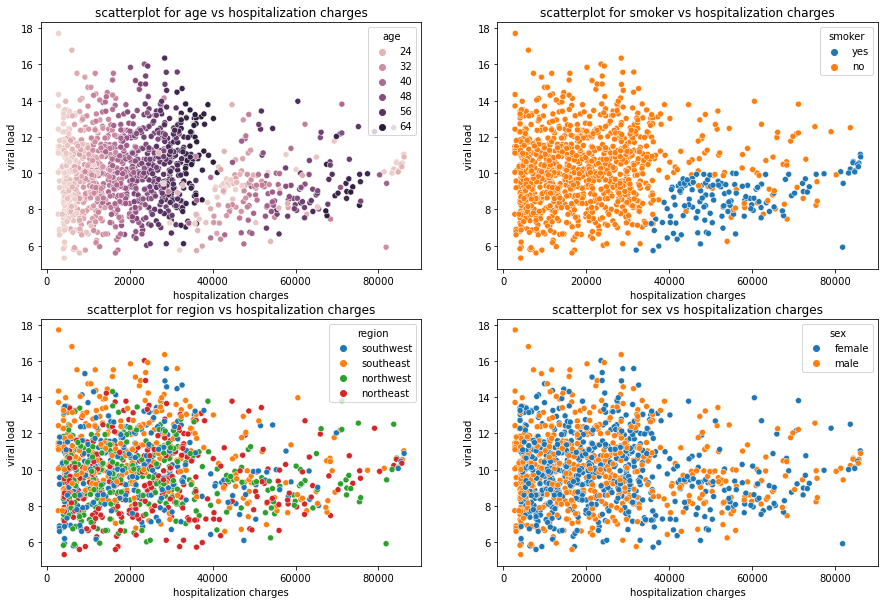

In [178]:
# Visualization after outlier removal
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.scatterplot(x = 'hospitalization charges', y = 'viral load',data = apollo_dcopy, hue ='age' )
ax1.set_title('scatterplot for age vs hospitalization charges')

ax1 = fig.add_subplot(222)
sns.scatterplot(x ='hospitalization charges', y = 'viral load', data = apollo_dcopy, hue ='smoker')
ax1.set_title('scatterplot for smoker vs hospitalization charges')

ax1 = fig.add_subplot(223)
sns.scatterplot(x = 'hospitalization charges', y = 'viral load',data = apollo_dcopy, hue ='region')
ax1.set_title('scatterplot for region vs hospitalization charges')

ax1 = fig.add_subplot(224)
sns.scatterplot(x = 'hospitalization charges',y = 'viral load',data = apollo_dcopy, hue ='sex')
ax1.set_title('scatterplot for sex vs hospitalization charges')

plt.show()

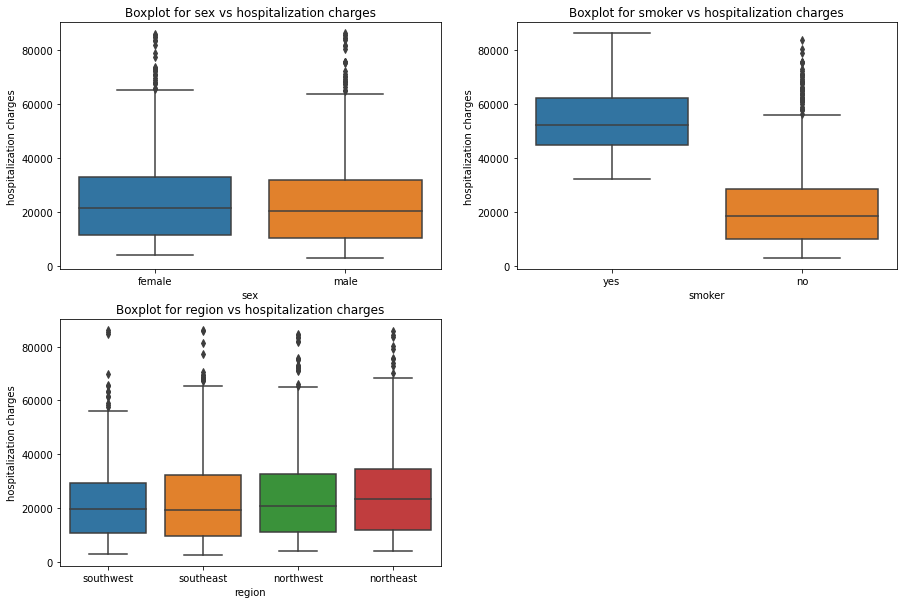

In [154]:
# Visualization after outlier removal
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.boxplot(x = 'sex', y = 'hospitalization charges', data = apollo_dcopy)
ax1.set_title('Boxplot for sex vs hospitalization charges')

ax1 = fig.add_subplot(222)
sns.boxplot(x = 'smoker', y = 'hospitalization charges', data = apollo_dcopy)
ax1.set_title('Boxplot for smoker vs hospitalization charges')

ax1 = fig.add_subplot(223)
sns.boxplot(x = 'region', y = 'hospitalization charges', data = apollo_dcopy)
ax1.set_title('Boxplot for region vs hospitalization charges')

plt.show()

**Observations:**

After dealing with the ouliers , 139 rows are removed out of 1338 from the dataset. As we can see from above boxplot, the data now looks more clean.

# Univariate Analysis : 

In [45]:
# Univariate analysis for numerical/continuous variables
def num_feat(col_data):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(col_data,kde=True,ax=ax[0],color='purple')
    ax[0].axvline(col_data.mean(),color='r',linestyle='--',linewidth=4)
    ax[0].axvline(col_data.median(),color='k',linestyle='dashed',linewidth=4)
    ax[0].axvline(col_data.mode()[0],color='y',linestyle='solid',linewidth=2)
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    plt.tight_layout()

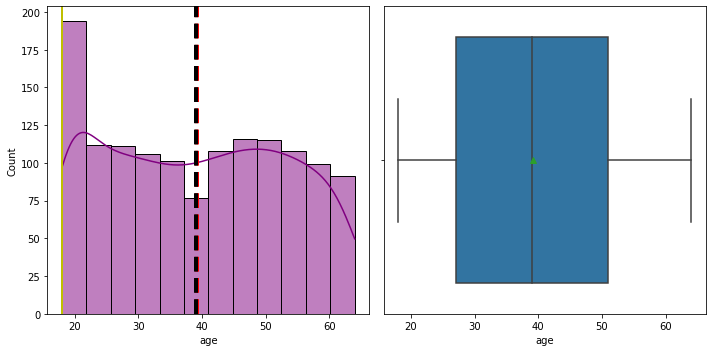

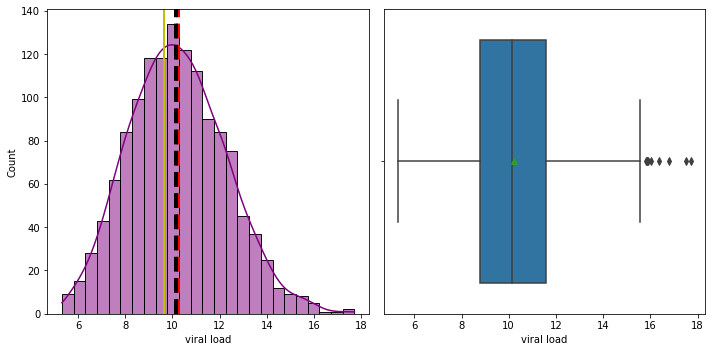

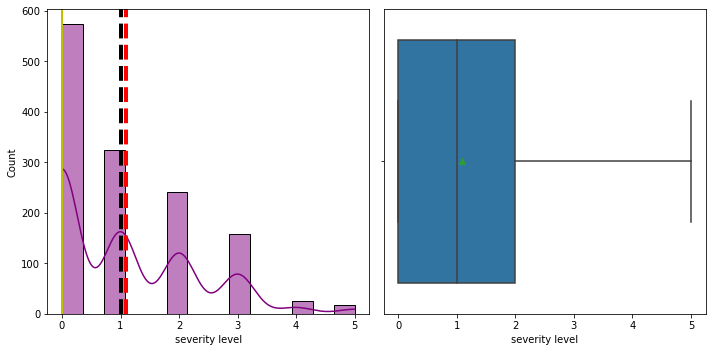

In [49]:
for i in num_cols:
    num_feat(apollo[i])

**Observations for univariate numerical features:**

- The Count is similar for all ages except first age bracket.
- There are outliers in viral load which tells us that, the viral load in not uniform.
- The count is maximum for 0 severity level.


In [52]:
#EDA on Univariate Categorical variables
def cat_feat(col_data):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    fig.suptitle(col_data.name+' wise ',fontsize=15)
    sns.countplot(col_data,ax=ax[0])
    col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
    plt.tight_layout()

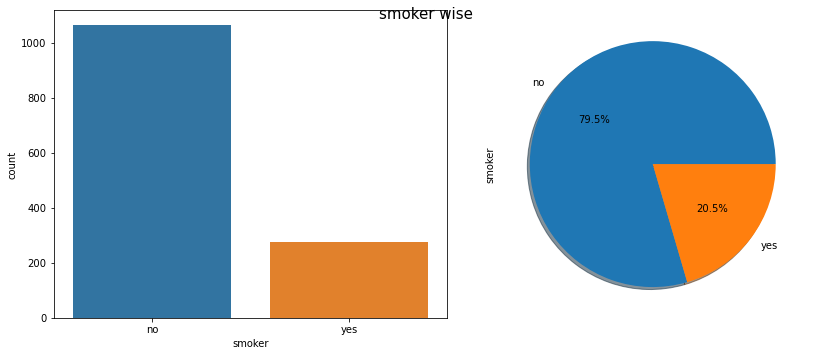

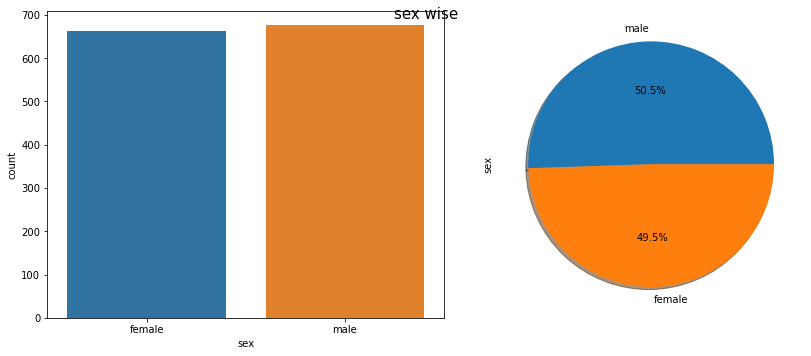

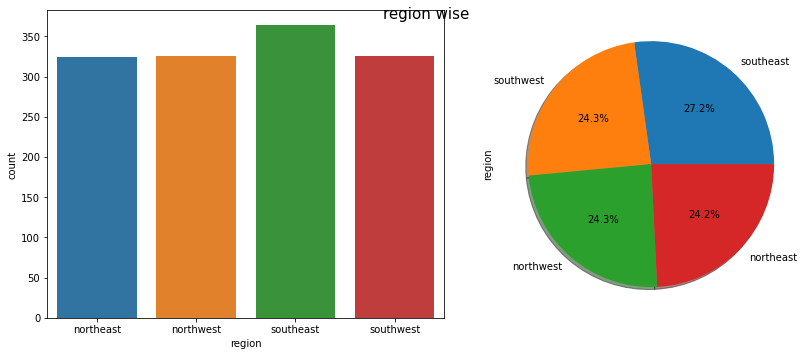

In [53]:
for i in cols:
    cat_feat(apollo[i])

**Observations for univariate categorical features:**

- The count is more or less same for the region and sex.
- For people who do not smoke, count is bit more.

# Bivariate Analysis:

In [55]:
region_data=apollo.groupby(['region'])['hospitalization charges'].sum()
region_data

region
northeast    10859173
northwest    10089281
southeast    13409229
southwest    10031883
Name: hospitalization charges, dtype: int64

In [56]:
region_data = region_data.reset_index()
region_data

,region,hospitalization charges
0,northeast,10859173
1,northwest,10089281
2,southeast,13409229
3,southwest,10031883


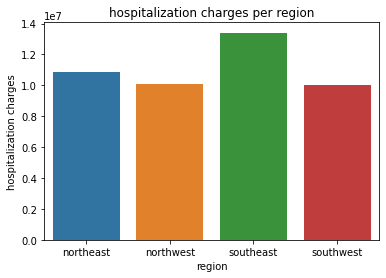

In [57]:
sns.barplot(x='region',y='hospitalization charges',data=region_data)
plt.title('hospitalization charges per region')
plt.show()

In [58]:
gender_data=apollo.groupby(['sex'])['hospitalization charges'].sum()
gender_data

sex
female    20802652
male      23586914
Name: hospitalization charges, dtype: int64

In [59]:
gender_data = gender_data.reset_index()
gender_data

,sex,hospitalization charges
0,female,20802652
1,male,23586914


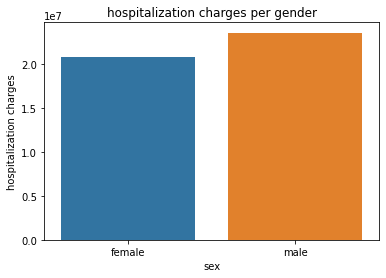

In [60]:
sns.barplot(x='sex',y='hospitalization charges',data=gender_data)
plt.title('hospitalization charges per gender')
plt.show()

In [61]:
smoke_data=apollo.groupby(['smoker'])['hospitalization charges'].sum()
smoke_data

smoker
no     22435159
yes    21954407
Name: hospitalization charges, dtype: int64

In [62]:
smoke_data = smoke_data.reset_index()
smoke_data

,smoker,hospitalization charges
0,no,22435159
1,yes,21954407


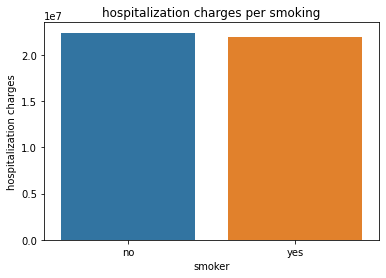

In [63]:
sns.barplot(x='smoker',y='hospitalization charges',data=smoke_data)
plt.title('hospitalization charges per smoking')
plt.show()

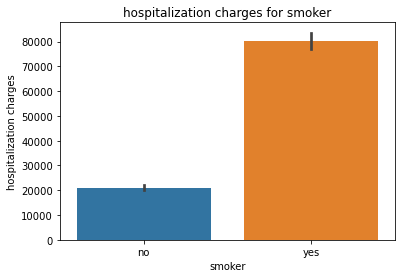

In [179]:
sns.barplot(x='smoker',y='hospitalization charges',data=apollo)
plt.title('hospitalization charges for smoker')
plt.show()

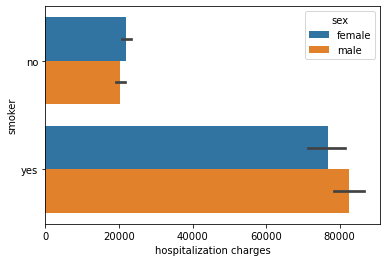

In [156]:
sns.barplot(x='hospitalization charges',y='smoker',  data=apollo,  hue='sex')
plt.show()

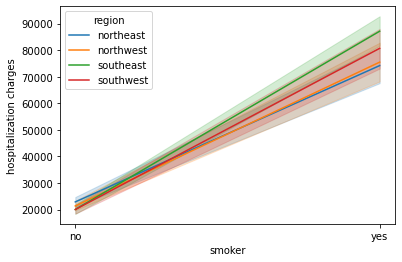

In [160]:
sns.lineplot(x='smoker',y='hospitalization charges',  data=apollo,  hue='region')
plt.show()

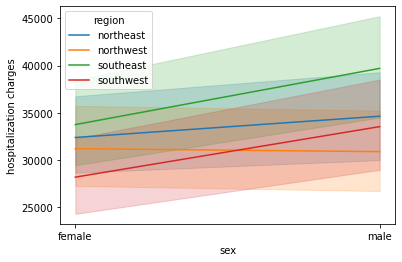

In [163]:
sns.lineplot(x='sex',y='hospitalization charges',  data=apollo,  hue='region')
plt.show()

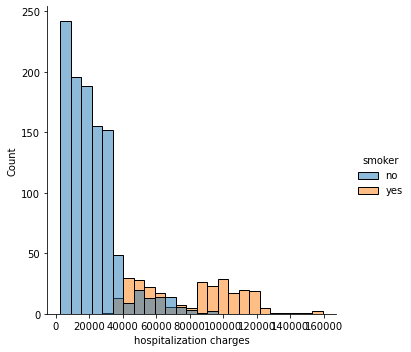

In [164]:
sns.displot(data = apollo, x = 'hospitalization charges', hue = 'smoker',bins = 25)
plt.show()

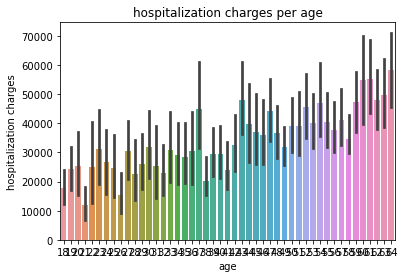

In [180]:
sns.barplot(x='age',y='hospitalization charges',data=apollo)
plt.title('hospitalization charges per age')
plt.show()

**Observations :** We can clearly see that, non smokers are having comaparitively lower hospitalization charges.

# Corelation between Bivariate features:

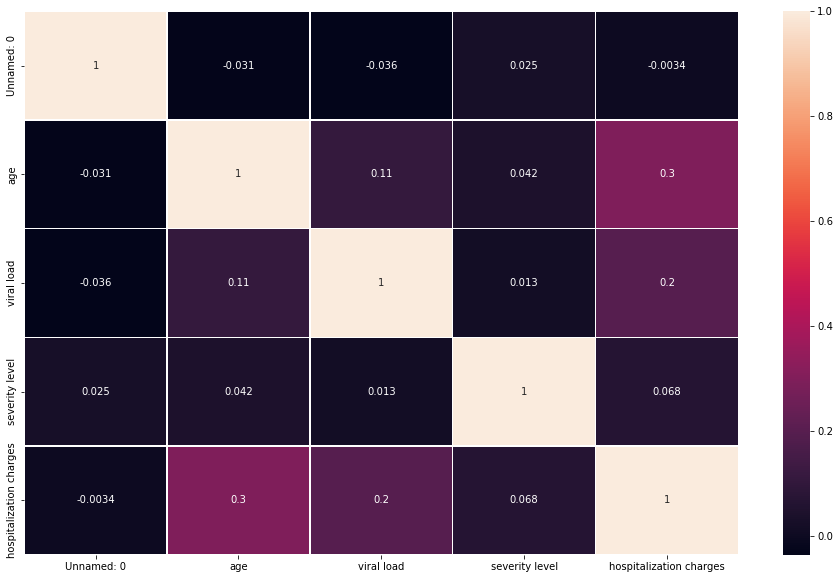

In [64]:
plt.figure(figsize=(16,10))
sns.heatmap(apollo.corr(),annot=True,linewidth=0.3,linecolor='white')
plt.show()

**Observations::**

- The age has higher corelation with the hospitalization charges as compared to the severity level.
- The severity level has a very low(near zero) positive corelation with the hospitalization charges which means, the severity level doesn't have an effect in the hospitalization charges.
- The Age has a moderated corelation (0.3) with the hospitalization charges. Young People tends to go out.

# Two - Sample T-Test
**Two- Sample T-Test to check if the viral load of females is different from that of males**

**Step 1: Define Null & Alternate Hypothesis**

Setting up Null Hypothesis (H0) and Stating the alternate hypothesis (Ha) and significance level
**H0 : The viral load of females and males is equal.**

**Ha : The viral load of females and males is not equal.**

alpha = 0.05
**Step 2: Validate the assumptions**

**Two-sample t-test assumptions**

- Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
- Data in each group must be obtained via a random sample from the population.
- Data in each group are normally distributed.
- Data values are continuous.
- The variances for the two independent groups are equal.

In [65]:
apollo.shape

(1338, 8)

In [67]:
apollo['sex'].value_counts(normalize=True)*100

male      50.523169
female    49.476831
Name: sex, dtype: float64

In [68]:
apollo['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [70]:
male_data=apollo[apollo['sex']=='male'].sample(500,replace=False)
male_data

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
865,865,40,male,no,southwest,9.97,2,16501
516,516,20,male,no,southeast,11.77,1,69311
986,986,43,male,no,northwest,10.04,3,21025
1015,1015,59,male,no,northwest,8.49,0,30312
239,239,44,male,no,southeast,12.69,1,17882
...,...,...,...,...,...,...,...,...
250,250,18,male,yes,northeast,5.76,2,32074
1310,1310,42,male,no,northwest,8.77,1,17352
381,381,55,male,yes,northeast,10.23,0,105759
253,253,27,male,no,southwest,10.10,3,10652


In [71]:
female_data=apollo[apollo['sex']=='female'].sample(500,replace=False)
female_data

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
419,419,63,female,yes,northwest,8.99,0,72376
380,380,27,female,yes,northeast,5.98,2,37516
862,862,55,female,no,northwest,11.18,2,30674
178,178,46,female,no,southwest,9.63,2,22058
1110,1110,54,female,no,northeast,10.77,1,28781
...,...,...,...,...,...,...,...,...
1010,1010,48,female,no,southwest,7.60,0,20673
1330,1330,57,female,no,southeast,8.58,2,31573
610,610,47,female,no,southeast,9.79,1,21369
860,860,37,female,yes,southwest,15.87,2,115284


**Checking assumptions of the test (Normality, Equal Variance)**

- Using visualization methods - Histogram, Q-Q plot
- Using statistical methods like levene’s test, Shapiro-wilk test

In [77]:
round(male_data['viral load'].std()**2,2),round(female_data['viral load'].std()**2,2)

(4.03, 4.4)

**Observations:** The variance is approximately equal for both the samples.

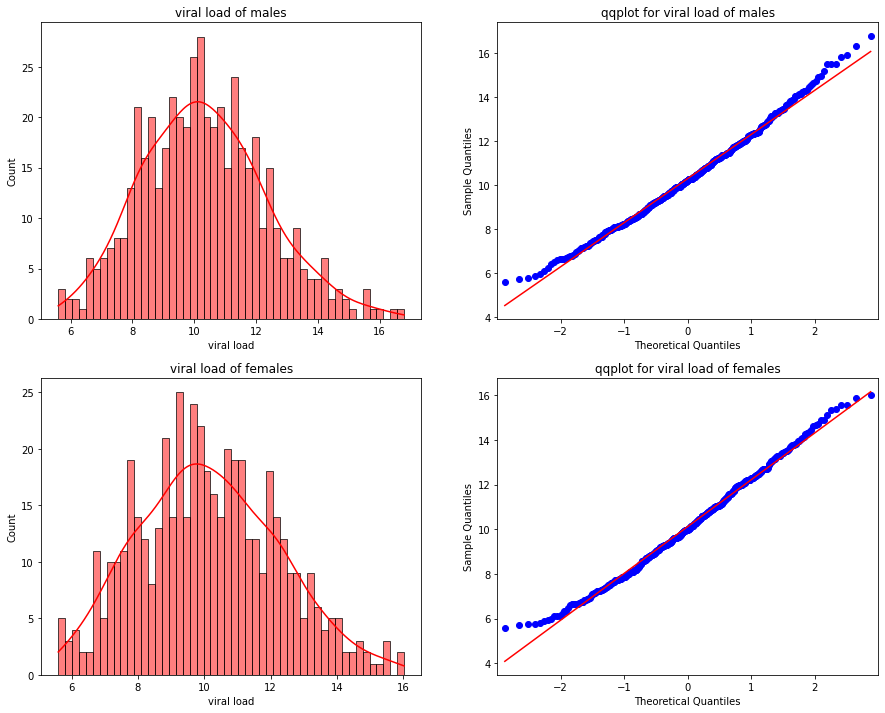

In [80]:
#Checking the normality
fig=plt.figure(figsize=(15,12))

ax1=fig.add_subplot(221)
sns.histplot(data=male_data,x='viral load',bins=50,kde=True,ax=ax1,color='red')
ax1.set_title('viral load of males')

ax2=fig.add_subplot(222)
sm.qqplot(male_data['viral load'],line='s',ax=ax2)
ax2.set_title('qqplot for viral load of males')

ax3=fig.add_subplot(223)
sns.histplot(data=female_data,x='viral load',bins=50,kde=True,ax=ax3,color='red')
ax3.set_title('viral load of females')

ax4=fig.add_subplot(224)
sm.qqplot(female_data['viral load'],line='s',ax=ax4)
ax4.set_title('qqplot for viral load of females')
plt.show()

In [81]:
# Calculating the p-value and test- statistics usinging ttest_ind() for this right skwed distribution sample.
# Alternative == greater as it's right skewed and one-sided
t_test,p_value=stats.ttest_ind(male_data['viral load'],female_data['viral load'],equal_var=False)
#,alternative='greater'
t_test, p_value

(1.3972078393368872, 0.16266224376729316)

**Observations:**

- The distribution of the population samples is normal and it's according our assumption for conducting 2 sample t test. Also the varaince of the samples is equal.Hence we will do log-transformation
- We got a p-value of 0.16 which is greater than 0.05 and hence we can say that we fail to reject null hypothesis. We will confirm after log - transformation as well

**Applying log on the data - Log Normal Distribution**

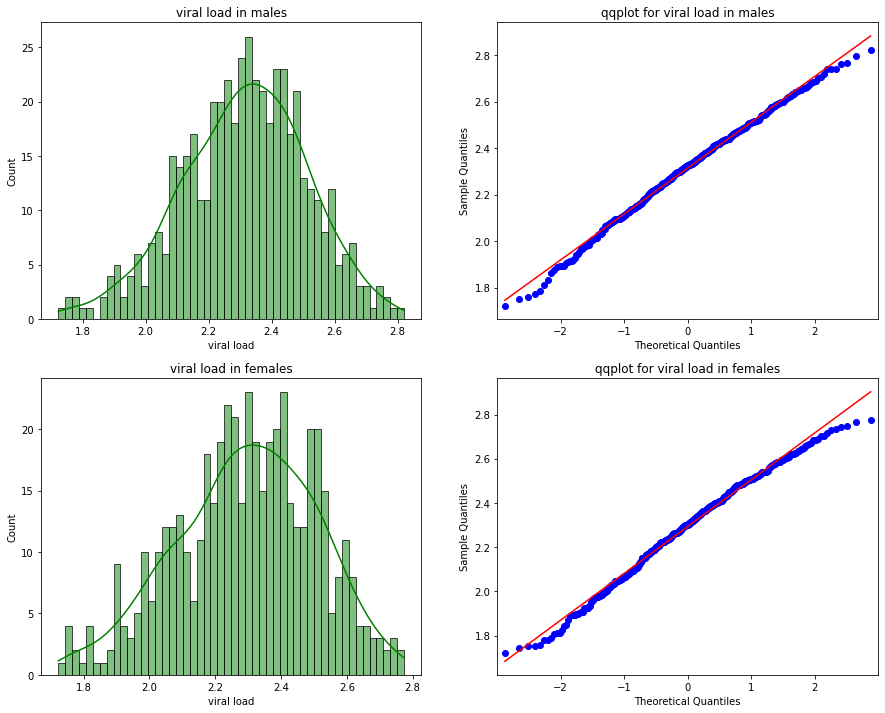

In [82]:
fig=plt.figure(figsize=(15,12))

ax1=fig.add_subplot(221)
sns.histplot(data=np.log(male_data['viral load']),bins=50,kde=True,ax=ax1,color='green')
ax1.set_title('viral load in males')

ax2=fig.add_subplot(222)
sm.qqplot(np.log(male_data['viral load']),line='s',ax=ax2)
ax2.set_title('qqplot for viral load in males')

ax3=fig.add_subplot(223)
sns.histplot(data=np.log(female_data['viral load']),bins=50,kde=True,ax=ax3,color='green')
ax3.set_title('viral load in females')

ax4=fig.add_subplot(224)
sm.qqplot(data=np.log(female_data['viral load']),line='s',ax=ax4)
ax4.set_title('qqplot for viral load in females')


plt.show()

In [83]:
round(np.log(male_data['viral load']).std()**2,2),round(np.log(female_data['viral load']).std()**2,2)

(0.04, 0.04)

**Observations:** After taking log on the sample population, we get a near normal distribution with variance very similar to each other. So we can calculate the p-value and test-statistics.

In [85]:
sample_w_log=np.log(male_data['viral load']).sample(500)
sample_nw_log=np.log(female_data['viral load']).sample(500)
sample_w_log,sample_nw_log

(112     2.329227
 149     2.248129
 62      2.107786
 291     2.290513
 1063    2.254445
           ...   
 1118    2.478218
 109     2.459589
 1033    1.972691
 403     2.376764
 224     2.105353
 Name: viral load, Length: 500, dtype: float64,
 745     2.306577
 1178    2.452728
 667     2.390596
 994     1.899118
 753     2.026832
           ...   
 1151    2.498152
 564     2.371178
 1076    2.367436
 1190    2.390596
 987     2.221375
 Name: viral load, Length: 500, dtype: float64)

In [86]:
statistic,p_value=stats.ttest_ind(sample_w_log,sample_nw_log)
#,alternative='greater'
statistic,p_value

(1.584242056854339, 0.11345545091063601)

In [87]:
def htResult(p_value):
    significance_level=0.05
    if p_value <=significance_level:
        print('Reject NULL HYPOTHESIS')
    else:
        print('Fail to Reject NULL HYPOTHESIS')

In [88]:
htResult(p_value)

Fail to Reject NULL HYPOTHESIS


In [89]:
stats.levene(sample_w_log,sample_nw_log,center='median')

LeveneResult(statistic=3.097848308687891, pvalue=0.07870215718509482)

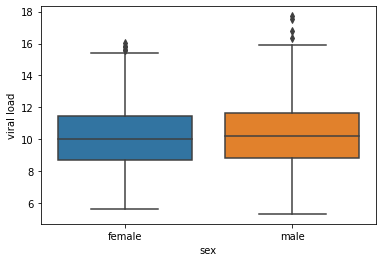

In [90]:
sns.boxplot(x='sex',y='viral load',data=apollo)

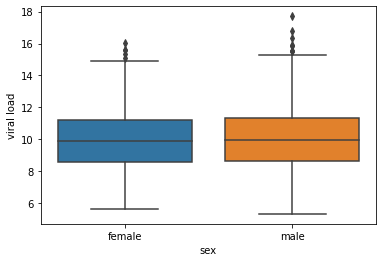

In [91]:
sns.boxplot(x='sex',y='viral load',data=apollo_dcopy)

**Conclusion : As the p value > alpha(0.05) , we fail to reject H0 and thus we can say that the viral load in females and males is equal. And we can confirm this using the boxplot as well**

# T-Test Right tailed
**T-Test to check if the hospitalization charges of people who do smoking is greater than those who don't**

**Step 1: Define Null & Alternate Hypothesis**

Setting up Null Hypothesis (H0) and Stating the alternate hypothesis (Ha) and significance level
**H0 : The hospitalization charges of smokers and non smokers is equal.**

**Ha : The hospitalization charges of smokers and non smokers is not equal.**

alpha = 0.05

**Step 2: Validate the assumptions**


In [165]:
apollo.shape

(1338, 8)

In [166]:
apollo['smoker'].value_counts(normalize=True)*100

no     79.521674
yes    20.478326
Name: smoker, dtype: float64

In [167]:
apollo['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [169]:
smoker_data=apollo[apollo['smoker']=='yes'].sample(250,replace=False)
smoker_data

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
954,954,34,male,yes,northwest,9.28,1,50024
1093,1093,22,female,yes,northwest,10.13,0,84769
1249,1249,32,male,yes,northeast,11.21,1,94019
1122,1122,53,female,yes,northwest,12.29,3,116654
1007,1007,47,male,yes,northwest,9.40,3,62288
...,...,...,...,...,...,...,...,...
262,262,52,male,yes,northeast,8.11,3,62175
1047,1047,22,male,yes,southeast,17.53,1,111253
917,917,45,male,yes,northeast,7.63,0,87673
1120,1120,23,female,yes,southwest,10.47,0,85416


In [170]:
nonsmoker_data=apollo[apollo['smoker']=='no'].sample(250,replace=False)
nonsmoker_data

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
1143,1143,39,male,no,southeast,10.78,2,15845
1154,1154,48,female,no,northwest,9.31,4,27538
1077,1077,21,male,no,northeast,8.68,0,5256
1066,1066,48,male,no,southeast,12.43,2,22445
258,258,51,male,no,northwest,8.14,4,28800
...,...,...,...,...,...,...,...,...
218,218,26,female,no,southeast,9.97,1,8482
12,12,23,male,no,southwest,11.47,0,4567
898,898,18,female,no,southeast,13.42,0,4086
740,740,45,male,no,northeast,8.01,2,21511


**Checking assumptions of the test (Normality, Equal Variance)**

- Using visualization methods - Histogram, Q-Q plot
- Using statistical methods like levene’s test, Shapiro-wilk test

In [172]:
round(smoker_data['hospitalization charges'].std()**2,2),round(nonsmoker_data['hospitalization charges'].std()**2,2)

(845192897.31, 206042030.7)

**Observations:** The variance is not equal for both the samples.

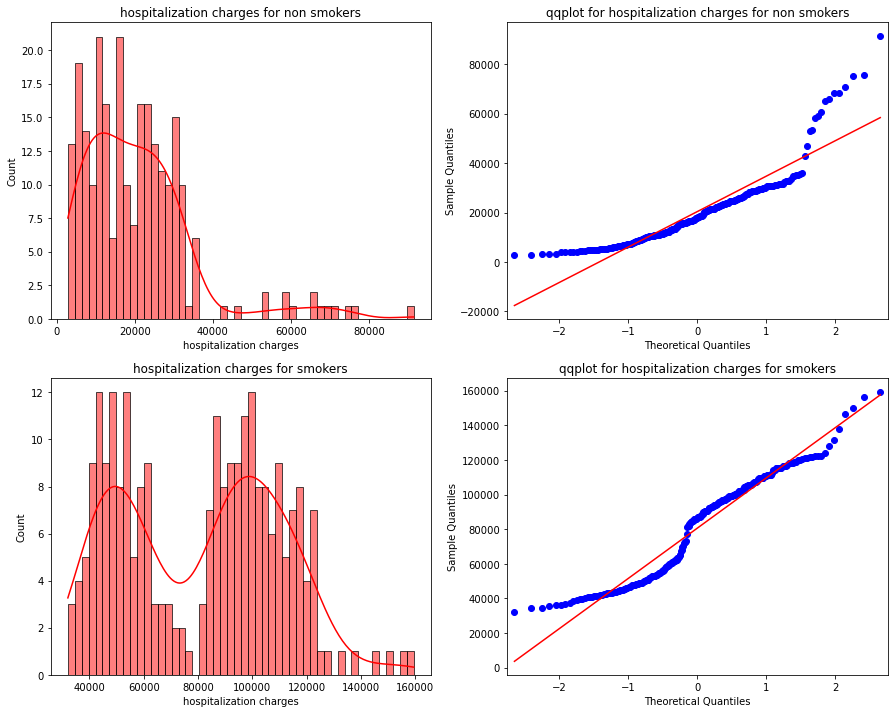

In [182]:
#Checking the normality
fig=plt.figure(figsize=(15,12))

ax1=fig.add_subplot(221)
sns.histplot(data=nonsmoker_data,x='hospitalization charges',bins=50,kde=True,ax=ax1,color='red')
ax1.set_title('hospitalization charges for non smokers')

ax2=fig.add_subplot(222)
sm.qqplot(nonsmoker_data['hospitalization charges'],line='s',ax=ax2)
ax2.set_title('qqplot for hospitalization charges for non smokers')

ax3=fig.add_subplot(223)
sns.histplot(data=smoker_data,x='hospitalization charges',bins=50,kde=True,ax=ax3,color='red')
ax3.set_title('hospitalization charges for smokers')

ax4=fig.add_subplot(224)
sm.qqplot(smoker_data['hospitalization charges'],line='s',ax=ax4)
ax4.set_title('qqplot for hospitalization charges for smokers')
plt.show()

In [187]:
# Calculating the p-value and test- statistics usinging ttest_ind() for this right skwed distribution sample.
# Alternative == greater as it's right skewed and one-sided
t_test,p_value=stats.ttest_ind(smoker_data['hospitalization charges'],nonsmoker_data['hospitalization charges'],equal_var=False)
#,alternative='greater'
t_test, p_value

(29.37048077112506, 5.216289463912757e-98)

**Observations:**

- The distribution of the population samples is right-skewed and it's not normal. 
- Also the varaince of the samples is unequal.Hence we will do log-transformation
- We got a p-value of less than 0.05 and hence we can say that we reject null hypothesis. We will confirm after log - transformation as well

**Applying log on the data - Log Normal Distribution**

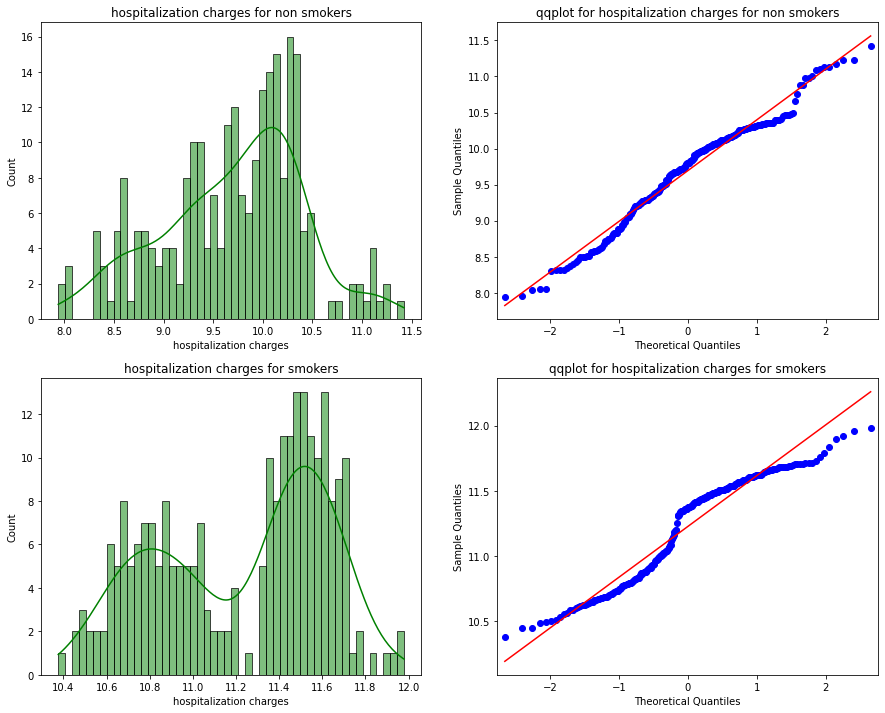

In [188]:
fig=plt.figure(figsize=(15,12))

ax1=fig.add_subplot(221)
sns.histplot(data=np.log(nonsmoker_data['hospitalization charges']),bins=50,kde=True,ax=ax1,color='green')
ax1.set_title('hospitalization charges for non smokers')

ax2=fig.add_subplot(222)
sm.qqplot(np.log(nonsmoker_data['hospitalization charges']),line='s',ax=ax2)
ax2.set_title('qqplot for hospitalization charges for non smokers')

ax3=fig.add_subplot(223)
sns.histplot(data=np.log(smoker_data['hospitalization charges']),bins=50,kde=True,ax=ax3,color='green')
ax3.set_title('hospitalization charges for smokers')

ax4=fig.add_subplot(224)
sm.qqplot(data=np.log(smoker_data['hospitalization charges']),line='s',ax=ax4)
ax4.set_title('qqplot for hospitalization charges for smokers')


plt.show()

In [189]:
round(np.log(nonsmoker_data['hospitalization charges']).std()**2,2),round(np.log(smoker_data['hospitalization charges']).std()**2,2)

(0.5, 0.15)

**Observations:** After taking log on the sample population, we get a near normal distribution with variance very similar to each other. So we can calculate the p-value and test-statistics.

In [190]:
sample_w_log=np.log(nonsmoker_data['hospitalization charges']).sample(250)
sample_nw_log=np.log(smoker_data['hospitalization charges']).sample(250)
sample_w_log,sample_nw_log

(1151    10.328428
 673      9.646205
 967      9.841346
 622     10.041291
 1061    10.271112
           ...    
 720     10.114113
 755      9.439705
 719     10.328069
 1264    10.163040
 1077     8.567126
 Name: hospitalization charges, Length: 250, dtype: float64,
 1313    11.418549
 262     11.037708
 380     10.532523
 1049    11.506092
 1249    11.451252
           ...    
 261     10.662259
 780     10.728715
 1040    10.831450
 1300    11.960696
 677     11.655518
 Name: hospitalization charges, Length: 250, dtype: float64)

In [191]:
statistic,p_value=stats.ttest_ind(sample_w_log,sample_nw_log)
#,alternative='greater'
statistic,p_value

(-30.06429529155616, 5.3510483376669424e-114)

In [192]:
htResult(p_value)

Reject NULL HYPOTHESIS


In [193]:
stats.levene(sample_w_log,sample_nw_log,center='median')

LeveneResult(statistic=52.37429057755087, pvalue=1.7466538046222e-12)

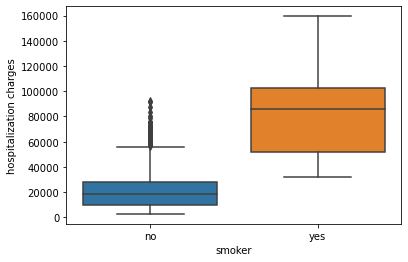

In [194]:
sns.boxplot(x='smoker',y='hospitalization charges',data=apollo)

**Conclusion :** 
- As the p value < alpha(0.05) , we reject H0 and thus we can say that the hospitalization charges in both smokers and non-smokers is un-equal. And we can confirm this using the boxplot as well.
- THe hospitalization charges in smokers are more.



# Chi-square test to check if the proportion of smoking dependent on  regions

**Assumptions:**

- Assumption 1: Both variables are categorical.
- Assumption 2: All observations are independent.
- Assumption 3: Cells in the contingency table are mutually exclusive.
- Assumption 4: Expected value of cells should be 5 or greater in at least 80% of cells.

    - It’s assumed that the expected value of cells in the contingency table should be 5 or greater in at least 80% of cells and that no cell should have an expected value less than 1.

**H0 : Both smoking and region are independent of each other**

**Ha : There is dependency of smoking on regions**

aplha = 0.05

In [92]:
contigency_table=pd.crosstab(apollo.smoker,apollo.region,margins=True,margins_name='Total')
contigency_table

region,northeast,northwest,southeast,southwest,Total
smoker,,,,,
no,257,267,273,267,1064
yes,67,58,91,58,274
Total,324,325,364,325,1338


In [93]:
contigency_table=contigency_table.rename(columns={'Total':'Row_Total'})
contigency_table

region,northeast,northwest,southeast,southwest,Row_Total
smoker,,,,,
no,257,267,273,267,1064
yes,67,58,91,58,274
Total,324,325,364,325,1338


# A Chi-Square Test of Independence

- As we doing independence test for 2 categorical vaiarbles we are using Chi-squared test.
- Expected value of cells should be 5 or greater in at least 80% of cells & that no cell should have an expected value less than 1.
- We can use the following formula to calculate the expected values for each cell in the contingency table:
- Expected value = (row sum * column sum) / table sum.

In [94]:
n=contigency_table.at['Total','Row_Total']
n

1338

In [95]:
exp=contigency_table.copy()
exp

region,northeast,northwest,southeast,southwest,Row_Total
smoker,,,,,
no,257,267,273,267,1064
yes,67,58,91,58,274
Total,324,325,364,325,1338


In [96]:
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        v=(((contigency_table.at[x,"Row_Total"])*(contigency_table.at["Total",y]))/n).round(2)
        exp.at[x,y]=float(v)
exp

region,northeast,northwest,southeast,southwest,Row_Total
smoker,,,,,
no,257,258,289,258,1064
yes,66,66,74,66,274
Total,324,325,364,325,1338


**No cell has expected counts less than 5, so we will continue with Chi Sqaure test**

In [97]:
apollo['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [98]:
apollo['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [99]:
apollo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Unnamed: 0               1338 non-null   int64   
 1   age                      1338 non-null   int64   
 2   sex                      1338 non-null   category
 3   smoker                   1338 non-null   category
 4   region                   1338 non-null   category
 5   viral load               1338 non-null   float64 
 6   severity level           1338 non-null   int64   
 7   hospitalization charges  1338 non-null   int64   
dtypes: category(3), float64(1), int64(4)
memory usage: 56.7 KB


In [100]:
region_dep=pd.crosstab(apollo['smoker'],apollo['region'])
region_dep

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [102]:
stat,p_value_chi,dof,expected=stats.chi2_contingency(region_dep)
stat,p_value_chi,dof,expected

(7.34347776140707,
 0.06171954839170547,
 3,
 array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
        [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))

In [103]:
htResult(p_value_chi)

Fail to Reject NULL HYPOTHESIS


**p- value (0.06171954839170547) > alpha(0.05) --> so we fail to reject H0 Which means smoking and regions do not have a significant dependency and Both smoking and region are not independent of each other**

**We can conclude that we fail to reject the H0 as we have enough evidence not to reject the null hypothesis, so it seems like smoking and regions are independent on each other**

# ANNOVA to check if mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level is similar or different.

**Assumptions:**

- Normality – that each sample is taken from a normally distributed population
- Sample independence – that each sample has been drawn independently of the other samples
- Variance equality – that the variance of data in the different groups should be the same
- Your dependent variable – here, “viral load”, should be continuous – that is, measured on a scale which can be subdivided using increments
1. weather

**H0 (Null Hupothesis) : viral load of females is same in diffrent types of severity level**

**Ha (Alternate Hupothesis) : viral load of females is different in diffrent types of severity level**

alpha: 0.05

We will be working on apollo and not on apollo_dcopy which is already created as a deep copy of the original dataset.
This is because, we need to conclude on the basis of all the data and not when we remove the ouliers

In [104]:
apollo['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [119]:
female=apollo.copy()
female=female[female['sex']=='female']
female

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
5,5,31,female,no,southeast,8.58,0,9392
6,6,46,female,no,southeast,11.15,1,20601
7,7,37,female,no,northwest,9.25,3,18204
9,9,60,female,no,northwest,8.61,0,72308
...,...,...,...,...,...,...,...,...
1332,1332,52,female,no,southwest,14.90,3,28529
1334,1334,18,female,no,northeast,10.64,0,5515
1335,1335,18,female,no,southeast,12.28,0,4075
1336,1336,21,female,no,southwest,8.60,0,5020


In [120]:
female['severity level'].value_counts()

0    289
1    158
2    119
3     77
4     11
5      8
Name: severity level, dtype: int64

In [121]:
female['viral load'].value_counts()

9.63     7
10.17    7
9.97     7
8.87     6
10.80    5
        ..
12.97    1
9.66     1
13.93    1
8.83     1
7.32     1
Name: viral load, Length: 354, dtype: int64

In [123]:
female=female[~(female['severity level']==5)]

In [124]:
female['severity level'].value_counts()

0    289
1    158
2    119
3     77
4     11
Name: severity level, dtype: int64

In [125]:
female=female[~(female['severity level']==4)]

In [126]:
female['severity level'].value_counts()

0    289
1    158
2    119
3     77
Name: severity level, dtype: int64

In [127]:
female=female[~(female['severity level']==3)]

In [128]:
female['severity level'].value_counts()

0    289
1    158
2    119
Name: severity level, dtype: int64

In [130]:
female

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
5,5,31,female,no,southeast,8.58,0,9392
6,6,46,female,no,southeast,11.15,1,20601
9,9,60,female,no,northwest,8.61,0,72308
11,11,62,female,yes,southeast,8.76,0,69522
...,...,...,...,...,...,...,...,...
1331,1331,23,female,no,southwest,11.13,0,26990
1334,1334,18,female,no,northeast,10.64,0,5515
1335,1335,18,female,no,southeast,12.28,0,4075
1336,1336,21,female,no,southwest,8.60,0,5020


**Checking assumptions of the test (Normality, Equal Variance)**

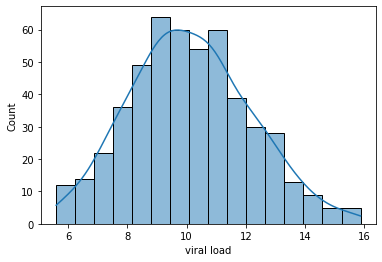

In [131]:
sns.histplot(female['viral load'].sample(500),kde=True)

In [133]:
#No Need to Take the log of the above distribution sample as it's already normal.
# sns.histplot(np.log(female['viral load'].sample(500)),kde=True)

In [151]:
# H0 : Series is Normal
# Ha : Series is not Normal
# alpha = 0.05
stats.shapiro(female['severity level'].sample(500))

ShapiroResult(statistic=0.749516487121582, pvalue=7.962825147803069e-27)

In [134]:
# H0 : Series is Normal
# Ha : Series is not Normal
# alpha = 0.05
stats.shapiro(female['viral load'].sample(500))

ShapiroResult(statistic=0.9916658997535706, pvalue=0.006604703608900309)

**Observations:** The distribution is already normal. So our assumption  holds true. 
Also, we have confirmed with the statistical test - Shapiro wik test that the series is normal. We will be going ahead with the test to check the results.

In [135]:
female['severity level'].value_counts()

0    289
1    158
2    119
Name: severity level, dtype: int64

**Normality Test:** We will perform normality check using **Shapiro test.**

The hypothesis of this test are:

- Null Hypothesis Ho - series is normal
- Alternative Hypothesis Ha - series is not normal

In [136]:
from scipy.stats import shapiro
def normality_check(series,alpha=0.05):
    statistic, p_value = shapiro(series)
    print(f'p value {p_value}')
    print(f'statistic value {statistic}')
    if p_value >= alpha:
        print('We fail to reject the Null Hypothesis H0')
    else:
        print('We reject the Null Hypothesis H0')

In [137]:
normality_check(female['viral load'].sample(500,replace=True))

p value 0.00574139691889286
statistic value 0.9914922118186951
We reject the Null Hypothesis H0


**Equality of Variance Test:**

We will perform equivalence check for using using **Levene's test.**

The hypothesis of this test are:

- Null Hypothesis Ho - Variances are equal
- Alternative Hypothesis Ha - Variances are not equal

In [141]:
female.groupby(['severity level'])['viral load'].describe()
# Variance is different for diff severity level 

,count,mean,std,min,25%,50%,75%,max
severity level,,,,,,,,
0,289.0,10.120727,1.989071,5.76,8.7300,9.980,11.530,15.80
1,158.0,10.017468,1.929065,5.60,8.6575,9.855,11.315,15.36
2,119.0,10.216807,2.209687,5.73,8.5900,10.430,11.585,16.02


In [143]:
from scipy.stats import levene
series1=female[female['severity level']==0]['viral load']
series2=female[female['severity level']==1]['viral load']
series3=female[female['severity level']==2]['viral load']

In [144]:
levene(series1,series2,series3)

LeveneResult(statistic=0.9435131022565071, pvalue=0.38987253596513605)

In [145]:
def variance_check(series1,series2,series3,alpha=0.05):
    statistic,pvalue = levene(series1,series2,series3)
    print(f'statistic value = {statistic}')
    print(f'p value = {pvalue}')
    if (pvalue>=alpha).all():
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

In [146]:
variance_check(series1,series2,series3)

statistic value = 0.9435131022565071
p value = 0.38987253596513605
We fail to reject the Null Hypothesis Ho


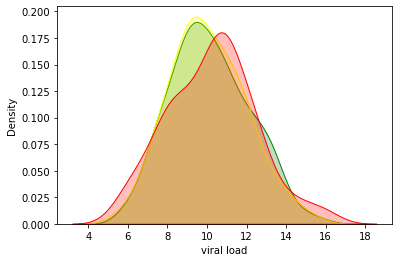

In [147]:
sns.kdeplot(series1,color='green',shade='green')
sns.kdeplot(series2,color='yellow',shade='yellow')
sns.kdeplot(series3,color='red',shade='red')
plt.show()

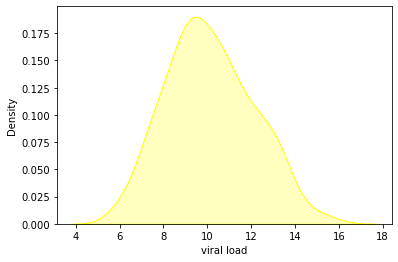

In [148]:
sns.kdeplot(series1,color='yellow',shade='yellow')


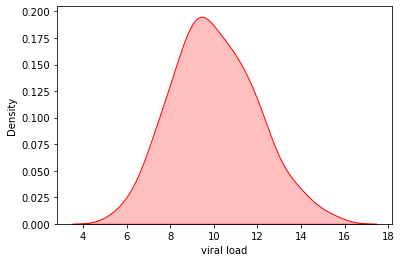

In [149]:
sns.kdeplot(series2,color='red',shade='red')

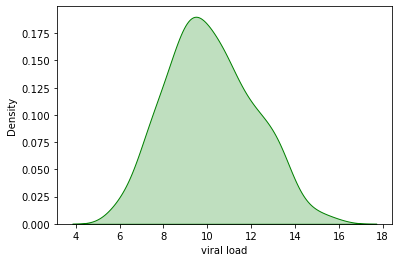

In [150]:
sns.kdeplot(series1,color='green',shade='green')

**Although our assumption failed for normality but for varaince passed, we will continue with One way Annova just to check what's the result.**

In [152]:
statistic,pvalue=stats.f_oneway(series1,series2,series3)
statistic,pvalue

(0.3355061434584082, 0.7151189650367746)

In [153]:
statis,pval=levene(series1,series2,series3)
statis,pval

(0.9435131022565071, 0.38987253596513605)

**Conclusion : As the p value > alpha(0.05) , we accept H0 and thus we can conclude that viral load remains same with a change in severity level.**

# Insights ,Conclusions , Inferences and Recommendations:

- There are total 3 categorical features namely sex, smoker, region and 5 numerical/continuos features . In total 8 independent features with 1338 rows.
- Missing data or Null values are not present , neither any duplicated row is there.
- After dealing with the ouliers , 139 rows are removed out of 1338 from the dataset. As we can see from above boxplot, the data now looks more clean.

univariate numerical features:

- The Count is similar for all ages except first age bracket.
- There are outliers in viral load which tells us that, the viral load in not uniform.
- The count is maximum for 0 severity level.

univariate categorical features:

- The count is more or less same for the region and sex.
- For people who do not smoke, count is bit more.

Corelation between Bivariate features:¶
- The age has higher corelation with the hospitalization charges as compared to the severity level.
- The severity level has a very low(near zero) positive corelation with the hospitalization charges which means, the severity level doesn't have an effect in the hospitalization charges.
- The Age has a moderated corelation (0.3) with the hospitalization charges. Young People tends to go out.

**2 sample t-test:**

- The distribution of the population samples is normal and it's according our assumption for conducting 2 sample t test. Also the varaince of the samples is equal.Hence we will do log-transformation
- We got a p-value of 0.16 which is greater than 0.05 and hence we can say that we fail to reject null hypothesis. We will confirm after log - transformation as well
- After taking log on the sample population, we get a near normal distribution with variance very similar to each other. So we can calculate the p-value and test-statistics.

- Conclusion : As the p value > alpha(0.05) , we fail to reject H0 and thus we can say that the viral load in females and males is equal. And we can confirm this using the boxplot as well

**T-Test Right tailed**
- The distribution of the population samples is right-skewed and it's not normal.
- Also the varaince of the samples is unequal.Hence we will do log-transformation
- We got a p-value of less than 0.05 and hence we can say that we reject null hypothesis. We will confirm after log - transformation as well
- After taking log on the sample population, we get a near normal distribution with variance very similar to each other. So we can calculate the p-value and test-statistics.

- As the p value < alpha(0.05) , we reject H0 and thus we can say that the hospitalization charges in both smokers and non-smokers is un-equal. And we can confirm this using the boxplot as well.
- THe hospitalization charges in smokers are more.

**Chi-Square test:**

- p- value (0.06171954839170547) > alpha(0.05) --> so we fail to reject H0 Which means smoking and regions do not have a significant dependency and Both smoking and region are not independent of each other

- We can conclude that we fail to reject the H0 as we have enough evidence not to reject the null hypothesis, so it seems like smoking and regions are independent on each other

**One-way Anova:**

- The distribution is already normal. So our assumption holds true. Also, we have confirmed with the statistical test - Shapiro wik test that the series is normal. We will be going ahead with the test to check the results.

- As the p value > alpha(0.05) , we accept H0 and thus we can conclude that viral load remains same with a change in severity level.

In order to conclude, we can say that all the major factors are affecting the hospitalization charges. The gender and sex can't be considered as a significant factor in predicting the charges. At the same time, the business team must focus on the smokers for increasing the hospitalization charges. So the team can try to idendify target groups in regions accordingly.